# Generate figures for the p63 MPRA paper
## Firgure 5. Cell type or isoform specificity.

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from statannotations.Annotator import Annotator
#generate statannotations-compatable list of comparisons
#dotplot
def overlap(r, tbl):
	target = round(r[tbl.columns[5]])
	perc = float(r['% of Target Sequences with Motif'].strip('%'))
	if perc == 0.0:
		return '0'
	total = round((target * 100) / perc)
	ovlp = str(target) + '/' + str(total)
	return ovlp
#set seaborn theme for nice figures
sns.set_theme(style="ticks",rc={"axes.spines.right": False, "axes.spines.top": False, 'font.size':10}, font='arial')
act_palette = {'Activating': sns.color_palette('RdYlBu')[-1], 'Repressing':sns.color_palette('RdYlBu')[0], 'Unchanged':sns.color_palette('RdGy')[4]}
#import key tables
os.chdir(r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\tables')
fig_out_path = r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\figures'
#import
df_fc = pd.read_csv('p63enh_starrseq_log2fc_matched_MCF10Ap53KO_HaCaT_SCC25_WTmut.csv', index_col=0)
df_fc_tap63b = pd.read_csv('p63enh_starrseq_log2fc_matched_MCF10AGus_TAp63B_WTmut.csv', index_col=0)
df = pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10AGus_TAp63B_WTmut.csv', index_col=0)
df_fc

,loc,cell_line,WT,mut,log2(WT/mut),activity,obs_score,p63RE_class,strand,p63RE_type,obs_p53
0,chr10_100043539_100043558,HaCaT,1.156849,0.759034,0.607964,Activating,19,primary,-,p53RE+p63RE,17.0
1,chr10_100043539_100043558,MCF10A p53KO,1.228455,0.646880,0.925274,Activating,19,primary,-,p53RE+p63RE,17.0
2,chr10_100043539_100043558,SCC25,0.724665,0.898260,-0.309819,Unchanged,19,primary,-,p53RE+p63RE,17.0
3,chr10_100157341_100157365,HaCaT,1.669188,1.068968,0.642928,Activating,13,primary,+,Unique p63RE,NaN
4,chr10_100157341_100157365,MCF10A p53KO,1.645843,1.356191,0.279266,Unchanged,13,primary,+,Unique p63RE,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25693,chr9_99129212_99129236,MCF10A p53KO,0.773522,0.691637,0.161428,Unchanged,10,primary,+,Unique p63RE,NaN
25694,chr9_99129212_99129236,SCC25,1.349398,0.621413,1.118691,Activating,10,primary,+,Unique p63RE,NaN
25695,chr9_99445438_99445462,HaCaT,1.401739,1.055114,0.409819,Unchanged,11,primary,-,Unique p63RE,NaN
25696,chr9_99445438_99445462,MCF10A p53KO,0.746343,0.534718,0.481060,Unchanged,11,primary,-,Unique p63RE,NaN


C:\Users\gaban\AppData\Local\Temp\ipykernel_5648\192771337.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size=10)


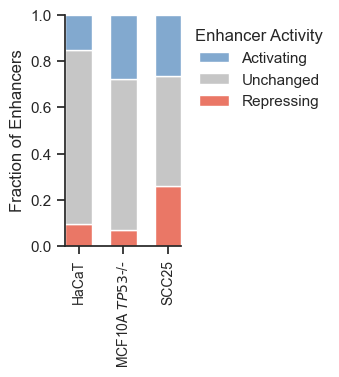

In [4]:
#5C stacked barchart
df_cp = df_fc.copy()
p53_name = 'MCF10A ' + '$\it{TP53}$' + '-/-'
df_cp.replace({'MCF10A p53KO':p53_name}, inplace=True)
df_cp['cell_line'] = pd.Categorical(df_cp['cell_line'], ['HaCaT',p53_name,'SCC25'])
fig5B, ax = plt.subplots(figsize=(1.5,3))
sns.histplot(
    data=df_cp,
    x="cell_line", hue="activity", hue_order=['Activating', 'Unchanged','Repressing'],
    multiple="fill", stat="percent", palette= act_palette,
    discrete=True, shrink=.6,ax=ax).set(ylabel = 'Fraction of Enhancers',xlabel=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title = 'Enhancer Activity')
fig5B.savefig(os.path.join(fig_out_path,'5B_20240508.pdf'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GUS_WT vs. TAp63β_WT: Wilcoxon test (paired samples), P_val:9.346e-166 Stat=4.891e+07


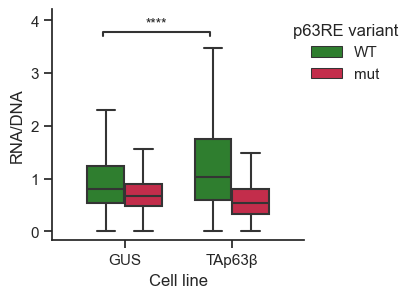

In [4]:
fig5E, ax = plt.subplots(figsize=(3.25,3))
# sns.set_context(rc={"xtick.labelsize":10})
df = df[df.enhancer_variant.isin(['WT', 'mut'])]
df.replace({'TAp63B':'TAp63β', 'pGus':'GUS'}, inplace=True)
cols = {'WT':'forestgreen', 'mut':'crimson'}
compare = [[('GUS','WT'),('TAp63β','WT')]]
sns.boxplot(data = df, x = 'cell_line',y = 'RNA/DNA',hue = 'enhancer_variant', width=0.7, palette = cols, showfliers = False, ax=ax).set(xlabel='Cell line')
annotator = Annotator(pairs = compare, data = df, x = 'cell_line',y = 'RNA/DNA',hue = 'enhancer_variant', ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.9, 1))
fig5E.savefig(os.path.join(fig_out_path,'5E_20240506.eps'), dpi=300, transparent=True, bbox_inches='tight')

C:\Users\gaban\AppData\Local\Temp\ipykernel_11060\205301375.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size=10)


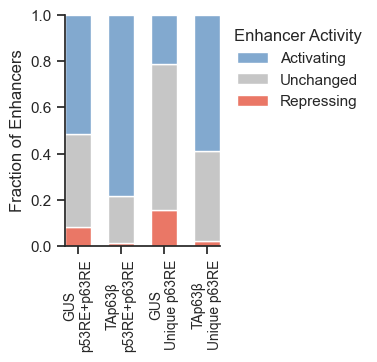

In [38]:
#separate into 4 groups and label them
fig5G, ax = plt.subplots(figsize=(2,3))
df_fc_tap63b['xlabel'] = df_fc_tap63b.apply(lambda row: row.cell_line + '\n' + row.p63RE_type, axis='columns')
df_fc_tap63b.replace({'TAp63B\np53RE+p63RE':'TAp63β\np53RE+p63RE','TAp63B\nUnique p63RE':'TAp63β\nUnique p63RE','pGus\np53RE+p63RE':'GUS\np53RE+p63RE','pGus\nUnique p63RE':'GUS\nUnique p63RE',}, inplace=True)
df_fc_tap63b['xlabel'] = pd.Categorical(df_fc_tap63b['xlabel'], ['GUS\np53RE+p63RE','TAp63β\np53RE+p63RE','GUS\nUnique p63RE','TAp63β\nUnique p63RE'])
sns.histplot(
    data=df_fc_tap63b,
    x="xlabel", hue="activity", hue_order=['Activating', 'Unchanged','Repressing'],
    multiple="fill", stat="percent", palette= act_palette,
    discrete=True, shrink=.6,ax=ax).set(ylabel = 'Fraction of Enhancers',xlabel=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title = 'Enhancer Activity')
fig5G.savefig(os.path.join(fig_out_path,'5G_20240506.pdf'), dpi=300, transparent=True, bbox_inches='tight')

In [5]:
#check numbers
df_fc_tap63b.value_counts(subset=['cell_line', 'activity'])

cell_line  activity  
TAp63B     Activating    10973
pGus       Unchanged      8470
           Activating     5702
TAp63B     Unchanged      4876
pGus       Repressing     1971
TAp63B     Repressing      294
dtype: int64

In [1]:
#2024-05-025
#sankey graph for all 4 cell types
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly
import os
os.chdir(r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\tables')
#format
tmp = pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10Ap53KO_HaCaT_SCC25_WTmut.csv')
tmp = tmp[tmp.enhancer_variant =='WT']
tmp_pivot = tmp.pivot(index='loc', columns='cell_line', values='activity').reset_index()

sankey_tbl = tmp_pivot.value_counts(subset=['HaCaT','MCF10A p53KO','SCC25']).reset_index()
sankey_tbl_ko_hac = tmp_pivot.value_counts(subset=['MCF10A p53KO','HaCaT']).reset_index()
sankey_tbl_ko_scc = tmp_pivot.value_counts(subset=['MCF10A p53KO', 'SCC25']).reset_index()

sankey_tbl.rename(columns={0:'count'}, inplace=True)
sankey_tbl_ko_hac.rename(columns={0:'count'}, inplace=True)
sankey_tbl_ko_scc.rename(columns={0:'count'}, inplace=True)

sankey_tbl['HaCaT'] = 'HaCat, ' + sankey_tbl['HaCaT'].astype(str)
sankey_tbl['MCF10A p53KO'] = 'MCF10A p53KO, ' + sankey_tbl['MCF10A p53KO'].astype(str)
sankey_tbl['SCC25'] = 'SCC25, ' + sankey_tbl['SCC25'].astype(str)

sankey_tbl_ko_hac['MCF10A p53KO'] = 'MCF10A p53KO, ' + sankey_tbl_ko_hac['MCF10A p53KO'].astype(str)
sankey_tbl_ko_hac['HaCaT'] = 'HaCat, ' + sankey_tbl_ko_hac['HaCaT'].astype(str)
sankey_tbl_ko_scc['SCC25'] = 'SCC25, ' + sankey_tbl_ko_scc['SCC25'].astype(str)
sankey_tbl_ko_scc['MCF10A p53KO'] = 'MCF10A p53KO, ' + sankey_tbl_ko_scc['MCF10A p53KO'].astype(str)

source = list(set(sankey_tbl.SCC25.tolist() + sankey_tbl['MCF10A p53KO'].tolist() + sankey_tbl.HaCaT.tolist()))

sankey_tbl_ko_hac[['source', 'target']] = sankey_tbl_ko_hac.apply(lambda row: [source.index(row.HaCaT), source.index(row['MCF10A p53KO'])], axis='columns', result_type='expand')
sankey_tbl_ko_scc[['source', 'target']] = sankey_tbl_ko_scc.apply(lambda row: [source.index(row['MCF10A p53KO']), source.index(row.SCC25)], axis='columns', result_type='expand')

def add_col(col):
	if 'Unchanged' in col: return 'silver'
	elif 'Activating' in col: return 'cornflowerblue'
	elif 'Repressing' in col: return 'salmon'
sankey_tbl_ko_hac['color'] = sankey_tbl_ko_hac['MCF10A p53KO'].apply(lambda x: add_col(x))
sankey_tbl_ko_scc['color'] = sankey_tbl_ko_scc['MCF10A p53KO'].apply(lambda x: add_col(x))

Text(0.5, 1.0, 'Activating enhacners')

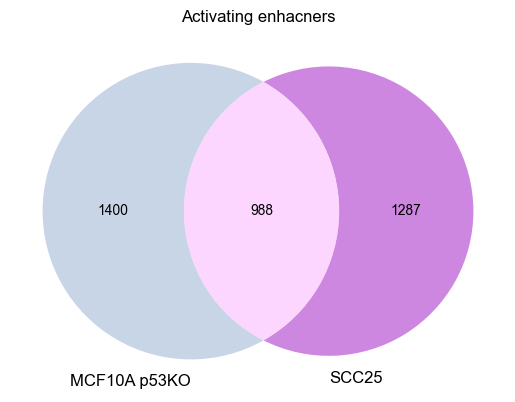

In [6]:
tmp
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
ko = set(tmp[(tmp.cell_line == 'MCF10A p53KO') & (tmp.activity == 'Activating')]['loc'].tolist())
scc = set(tmp[(tmp.cell_line == 'SCC25') & (tmp.activity == 'Activating')]['loc'].tolist())
font = {'family': 'Arial', 'size': 10} # use for labels
plt.rc('font', **font) # sets the default font
up_treat = venn2([ko,scc], set_labels = ('MCF10A p53KO', 'SCC25'),
				 set_colors=("lightsteelblue", "mediumorchid"),alpha=0.7)
plt.title('Activating enhacners')

In [61]:
#this is with all three
from plotly.graph_objs import *

fig5C=go.Figure(data=[go.Sankey(
    node = dict(pad = 15,thickness = 20,line = dict(color = "black", width = 0.5),
    color = ['cornflowerblue', 'silver','salmon', 'salmon', 'cornflowerblue', 'cornflowerblue','silver','salmon','silver']),
    link = dict(
      source = sankey_tbl_ko_scc.source.tolist() + sankey_tbl_ko_hac.source.tolist(), # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = sankey_tbl_ko_scc.target.tolist() + sankey_tbl_ko_hac.target.tolist(),
      value = sankey_tbl_ko_scc['count'].tolist() + sankey_tbl_ko_hac['count'].tolist(),
	  color = sankey_tbl_ko_scc.color.tolist() + sankey_tbl_ko_hac.color.tolist())
)],
	layout = Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)'))
fig5C.update_layout(autosize=False,width=400,height=400)
fig5C.show()
fig5C.write_image(os.path.join(fig_out_path,"5C_20240502.pdf"))

In [36]:
df_fc.value_counts(subset=['cell_line','activity'])

cell_line     activity  
HaCaT         Unchanged     6442
MCF10A p53KO  Unchanged     5575
SCC25         Unchanged     4084
MCF10A p53KO  Activating    2388
SCC25         Activating    2275
              Repressing    2207
HaCaT         Activating    1301
              Repressing     823
MCF10A p53KO  Repressing     603
dtype: int64

C:\Users\gaban\AppData\Local\Temp\ipykernel_26176\2457477562.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size=10)


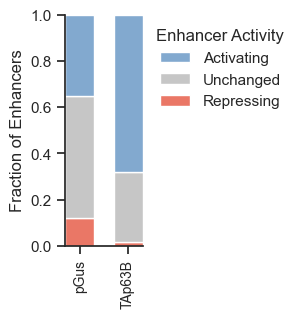

In [2]:
#separate into 4 groups and label them
fig5F, ax = plt.subplots(figsize=(1,3))
df_fc_tap63b['cell_line'] = pd.Categorical(df_fc_tap63b['cell_line'], ['pGus','TAp63B'])
sns.histplot(
    data=df_fc_tap63b,
    x="cell_line", hue="activity", hue_order=['Activating', 'Unchanged','Repressing'],
    multiple="fill", stat="percent", palette= act_palette,
    discrete=True, shrink=.6,ax=ax).set(ylabel = 'Fraction of Enhancers',xlabel=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title = 'Enhancer Activity')
fig5F.savefig(os.path.join(fig_out_path,'5F_20240430.pdf'), dpi=300, transparent=True, bbox_inches='tight')

# TF motif enrichment in activating or repressing enhanser using Homer
- Create 3 lists of p63RE coordinates based on enhancer activity (1.5FC threshold) in SCC25
- Use homer with the foliwing parameters:
	+ *findMotifsGenome.pl*
	+ List of 'activatin' or 'Repressing' p63RE coordinates
	+ *-size* 60 (looks up sequence 60nt in each direction from coordinate center; MPRA enhancer fragments are 119-120nt)
	+ *-bg* list of 'Unchanged' p63RE coordinates
- Use the output knownmotifs.txt table to plot motif enrichment

In [23]:
#import libraries
import pandas as pd
import os
order = ['Activating', 'Unchanged', 'Repressing']
#import key tables
os.chdir(r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\tables')
out_path = r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\homer'
df = pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10Ap53KO_HaCaT_SCC25_WTmut.csv', usecols=['loc', 'cell_line', 'activity', 'enhancer_variant', 'strand'])
#only need p53KOs and one variant to remove duplicated locations
df = df[(df.cell_line == 'SCC25') & (df.enhancer_variant == 'WT')]
df[['chrom','p63RE_start','p63RE_end']] = df.apply(lambda row: row['loc'].split('_'), result_type='expand', axis='columns')
df_act = df[df.activity == 'Activating']
df_rep = df[df.activity == 'Repressing']
df_unch = df[df.activity == 'Unchanged']
df_act.loc[:,['loc','chrom','p63RE_start','p63RE_end','strand']].to_csv(os.path.join(out_path,'homer_act_1.5FC_SCC25.txt'), index=False, header=False,sep='\t')
df_rep.loc[:,['loc','chrom','p63RE_start','p63RE_end','strand']].to_csv(os.path.join(out_path,'homer_rep_1.5FC_SCC25.txt'), index=False, header=False,sep='\t')
df_unch.loc[:,['loc','chrom','p63RE_start','p63RE_end','strand']].to_csv(os.path.join(out_path,'homer_unch_1.5FC_SCC25.txt'), index=False, header=False,sep='\t')
df = pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10Ap53KO_HaCaT_SCC25_WTmut.csv', usecols=['loc', 'cell_line', 'activity', 'enhancer_variant', 'strand'])
#only need p53KOs and one variant to remove duplicated locations
df = df[(df.cell_line == 'MCF10A p53KO') & (df.enhancer_variant == 'WT')]
df[['chrom','p63RE_start','p63RE_end']] = df.apply(lambda row: row['loc'].split('_'), result_type='expand', axis='columns')
df_act = df[df.activity == 'Activating']
df_rep = df[df.activity == 'Repressing']
df_unch = df[df.activity == 'Unchanged']
df_act.loc[:,['loc','chrom','p63RE_start','p63RE_end','strand']].to_csv(os.path.join(out_path,'homer_act_1.5FC_MCF10Ap53KO_fig5.txt'), index=False, header=False,sep='\t')
df_rep.loc[:,['loc','chrom','p63RE_start','p63RE_end','strand']].to_csv(os.path.join(out_path,'homer_rep_1.5FC_MCF10Ap53KO_fig5.txt'), index=False, header=False,sep='\t')
df_unch.loc[:,['loc','chrom','p63RE_start','p63RE_end','strand']].to_csv(os.path.join(out_path,'homer_unch_1.5FC_MCF10Ap53KO_fig5.txt'), index=False, header=False,sep='\t')
#run homer motif enrichemnt using these act/rep files and unchanged enhancers as background

In [13]:
#read in and format homer output
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
#generate statannotations-compatable list of comparisons
#dotplot
def overlap(r, tbl):
	target = round(r[tbl.columns[5]])
	perc = float(r['% of Target Sequences with Motif'].strip('%'))
	if perc == 0.0:
		return '0'
	total = round((target * 100) / perc)
	ovlp = str(target) + '/' + str(total)
	return ovlp
def size(r):
	target = float(r['% of Target Sequences with Motif'].strip('%'))
	bg = float(r['% of Background Sequences with Motif'].strip('%'))
	if bg == 0.0:
		return '0'
	ovlp = target / bg
	return ovlp
fig_out_path = r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\figures'
homer_path = r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\homer'
scc = pd.read_csv(os.path.join(homer_path,'homer_motifs_act_1.5FC_SCC25_bg_unch_fig5','knownResults.txt'), sep='\t')
pko = pd.read_csv(os.path.join(homer_path,'homer_motifs_act_1.5FC_MCF10Ap53KO_bg_unch_fig5','knownResults.txt'), sep='\t')
top = 50 #top motifs
pko['cell_line'], scc['cell_line'] = 'MCF10A\n' + '$\it{TP53}$' + '-/-','SCC25' #changes TP53 to italics
#rename variable columns for concatenation
for tbl in [pko, scc]:
	tbl.rename(columns={tbl.columns[5]:'# of Target Sequences with Motif',
	tbl.columns[7]:'# of Background  Sequences with Motif'}, inplace=True)
#merge into one long table
long = pd.concat([pko, scc],axis=0, ignore_index=True)
#simplify motif name by exrtacting short name
long['tf'] = long['Motif Name'].apply(lambda x: x[:x.find('(')])
#calculate % overlap
long['Overlap'] = long.apply(lambda row: overlap(row, long),axis='columns')
long['Enrichment over background'] = long.apply(lambda row: size(row), axis='columns')
long.rename(columns={'q-value (Benjamini)':"Adjusted P-value"},inplace=True)
long = long[(long["Adjusted P-value"] < 0.05) & (long['Motif Name'] != 'p53(p53)/mES-cMyc-ChIP-Seq(GSE11431)/Homer')]
#use this if need to remove p53/63/73 since they're always enriched
# filtered = long[(~long.tf.isin(['p53','p63','p73'])) & (long.Overlap != '0') & (long['Adjusted P-value'] < 0.05)]
# new  = pd.concat([filtered[filtered.cell_line == 'SCC25'].nsmallest(top, 'Adjusted P-value'), filtered[filtered.cell_line == 'MCF10A\np53KO'].nsmallest(top, 'Adjusted P-value')])
# new.sort_values(by='Adjusted P-value', inplace=True)
all_tf = list(set(long.tf.tolist()))
scc_tf = list(set(long[long.cell_line == 'SCC25'].tf.tolist()))
pko_tf = list(set(long[long.cell_line != 'SCC25'].tf.tolist()))
shared = list(set(pko_tf).intersection(scc_tf))
uniq_scc = [tf for tf in scc_tf if tf not in shared]
uniq_pko = [tf for tf in pko_tf if tf not in shared]

C:\Users\gaban\AppData\Local\Temp\ipykernel_5648\3450127146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shared.sort_values(by='tf', inplace=True)


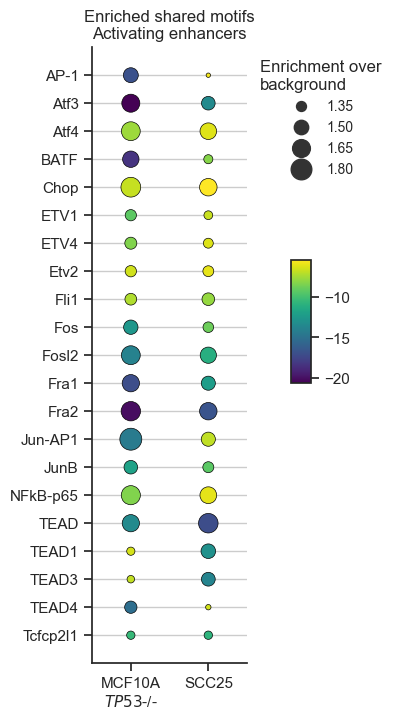

In [15]:
sns.set_style({'axes.grid.axis' : 'y','axes.grid' : True})
df_shared = long[long.tf.isin(shared)]
df_shared.sort_values(by='tf', inplace=True)
fig5F, ax = plt.subplots(figsize=(2,8))
sns.scatterplot(data=df_shared, x='cell_line', y='tf', hue='Log P-value', size= 'Enrichment over background',
				sizes=(10,250),palette='viridis',edgecolor='black',ax=ax).set(ylabel = None,xlim=(-0.5, 1.5), title='Enriched shared motifs\nActivating enhancers', xlabel=None)
ax.axes.xaxis.grid(False)
norm = plt.Normalize(df_shared['Log P-value'].min(), df_shared['Log P-value'].max())
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cax = fig5F.add_axes([ax.get_position().x1+0.22, ax.get_position().y0+0.35, 0.1, ax.get_position().height / 5])
ax.figure.colorbar(sm, cax=cax)
h, l = ax.get_legend_handles_labels()
# slice the appropriate section of l and h to include in the legend
ax.legend(h[7:], l[7:], bbox_to_anchor=(1, 1), fontsize=10,frameon = False, title='Enrichment over\nbackground')
fig5F.savefig(os.path.join(fig_out_path,'5F_20240508.eps'), dpi=300, transparent=True, bbox_inches='tight')

C:\Users\gaban\AppData\Local\Temp\ipykernel_5648\714061940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uniq.sort_values(by='tf', inplace=True)


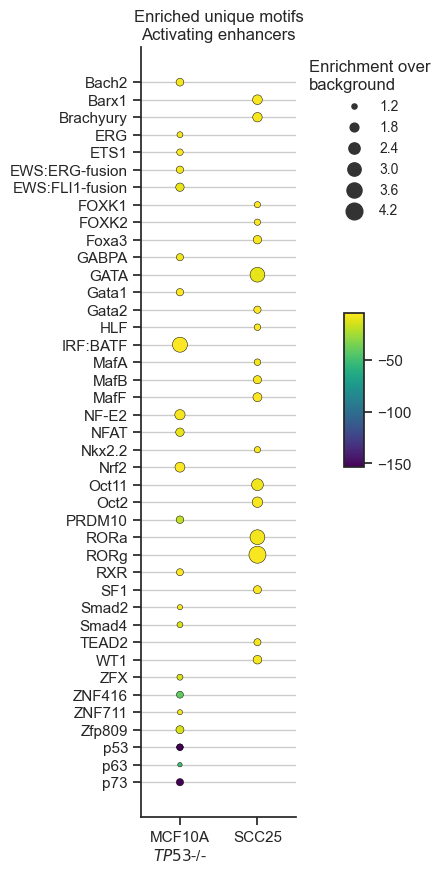

In [18]:
df_uniq = long[long.tf.isin(uniq_pko + uniq_scc)]
df_uniq.sort_values(by='tf', inplace=True)
fig5E, ax = plt.subplots(figsize=(2,10))
sns.scatterplot(data=df_uniq, x='cell_line', y='tf', hue='Log P-value', size= 'Enrichment over background',
				sizes=(10,150),palette='viridis',edgecolor='black',ax=ax).set(ylabel = None,xlim=(-0.5, 1.5), title='Enriched unique motifs\nActivating enhancers', xlabel=None)
ax.axes.xaxis.grid(False)
norm = plt.Normalize(df_uniq['Log P-value'].min(), df_uniq['Log P-value'].max())
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cax = fig5E.add_axes([ax.get_position().x1+0.24, ax.get_position().y0+0.35, 0.1, ax.get_position().height / 5])
ax.figure.colorbar(sm, cax=cax)
h, l = ax.get_legend_handles_labels()
# slice the appropriate section of l and h to include in the legend
ax.legend(h[8:], l[8:], bbox_to_anchor=(1, 1), fontsize=10,frameon = False, title='Enrichment over\nbackground')
fig5E.savefig(os.path.join(fig_out_path,'5E_20240508.eps'), dpi=300, transparent=True, bbox_inches='tight')